In [1]:
# 1) Design model ( input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#    - forward pass: compute prediction
#    - backward pass: gradients
#    - update weights

In [2]:
import torch

In [3]:
import torch.nn as nn

In [4]:
import numpy as np

In [6]:
from sklearn import datasets

In [8]:
import matplotlib.pyplot as plt

In [10]:
# 0. Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100,
                                           n_features=1,
                                           noise=20,
                                           random_state=1)
print(f"Shape of X_numpy: {X_numpy.shape}")
print(f"Shape of y_numpy: {y_numpy.shape}")

Shape of X_numpy: (100, 1)
Shape of y_numpy: (100,)


In [11]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(f"Shape of X_numpy: {X.shape}")
print(f"Shape of y_numpy: {y.shape}")

Shape of X_numpy: torch.Size([100, 1])
Shape of y_numpy: torch.Size([100])


In [12]:
y = y.view(y.shape[0], 1)

In [13]:
print(f"Shape of y_numpy: {y.shape}")

Shape of y_numpy: torch.Size([100, 1])


In [14]:
n_samples, n_features = X.shape

In [15]:
# 1. design model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [16]:
# 2. loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)


In [18]:
# 3. training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss calculation
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        [w, b] = model.parameters()
        print(f"epoch {epoch + 1}, w = {w[0][0].item():.3f}, loss = {loss.item():.8f}")
    
    
    

epoch 10, w = 12.597, loss = 4321.13574219
epoch 20, w = 22.866, loss = 3227.26098633
epoch 30, w = 31.618, loss = 2435.14599609
epoch 40, w = 39.079, loss = 1860.96887207
epoch 50, w = 45.440, loss = 1444.37902832
epoch 60, w = 50.864, loss = 1141.86572266
epoch 70, w = 55.491, loss = 922.01641846
epoch 80, w = 59.437, loss = 762.12573242
epoch 90, w = 62.804, loss = 645.76330566
epoch 100, w = 65.678, loss = 561.02703857


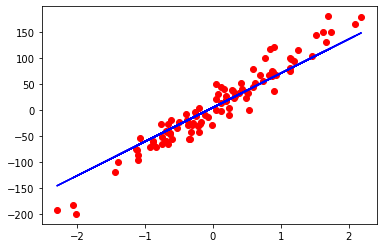

In [19]:
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()